In [2]:
import tensorflow as ts
from tensorflow import keras
from tensorflow.keras import Sequential,layers
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import os
import PIL
import cv2 as cv

In [2]:
os.getcwd()

'C:\\Users\\Arbaj'

In [3]:
os.chdir('C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data')

In [4]:
os.getcwd()

'C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data'

In [5]:
path='C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\train'
category=['cats','dogs']
data=[]
for i in category:
    folder=os.path.join(path,i)
    for j in os.listdir(folder):
        label=category.index(i)
        imgpath=os.path.join(folder,j)
        img=cv.imread(imgpath)
        arr=cv.resize(img,(200,200))
        #plt.imshow(arr)
        data.append([arr,label])

In [6]:
data[23][1]

1

In [7]:
len(data)

40

In [8]:
import random
random.shuffle(data)

In [9]:
X=[]
y=[]
for i ,j in data:
    X.append(i)
    y.append(j)

In [10]:
X=np.array(X)
y=np.array(y)

In [11]:
y[1]

1

In [12]:
X=X/255
X[1][1][1]#ryb

array([0.32941176, 0.2627451 , 0.25098039])

In [13]:
X.shape

(40, 200, 200, 3)

In [3]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D,Dropout

● Input layer 
● Convolutional layer 1 with 32 filters of kernel size[5,5] 
● Pooling layer 1 with pool size[2,2] and stride 2 
● Convolutional layer 2 with 64 filters of kernel size[5,5] 
● Pooling layer 2 with pool size[2,2] and stride 2 
● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
● Dropout layer with dropout probability 0.4 
Predict the class by doing a softmax on the output of the dropout layers. 
This should be followed by training and evaluation: 
● For the training step, define the loss function and minimize it 
● For the evaluation step, calculate the accuracy 
Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data. 

In [5]:
fc_size=32
model=Sequential()
model.add(layers.experimental.preprocessing.RandomFlip('horizontal'))
model.add(layers.experimental.preprocessing.RandomRotation(0.1))
model.add(layers.experimental.preprocessing.RandomZoom(0.1))
model.add(layers.experimental.preprocessing.RandomContrast(0.1))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(fc_size,input_shape=(200,200,3),activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X,y,epochs=10,batch_size=5)

Epoch 1/10
8/8 [==============================] - 24s 54ms/step - loss: 2.0329 - accuracy: 0.4750
Epoch 2/10
8/8 [==============================] - 0s 48ms/step - loss: 0.6992 - accuracy: 0.4250
Epoch 3/10
8/8 [==============================] - 0s 46ms/step - loss: 0.6974 - accuracy: 0.5250
Epoch 4/10
8/8 [==============================] - 0s 45ms/step - loss: 0.6952 - accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 0s 50ms/step - loss: 0.6906 - accuracy: 0.5750
Epoch 6/10
8/8 [==============================] - 0s 46ms/step - loss: 0.6921 - accuracy: 0.5750
Epoch 7/10
8/8 [==============================] - 0s 47ms/step - loss: 0.6935 - accuracy: 0.5500
Epoch 8/10
8/8 [==============================] - 0s 49ms/step - loss: 0.6845 - accuracy: 0.5750
Epoch 9/10
8/8 [==============================] - 0s 48ms/step - loss: 0.6939 - accuracy: 0.6250
Epoch 10/10
8/8 [==============================] - 0s 51ms/step - loss: 0.7473 - accuracy: 0.4250


In [4]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras.models import Model

In [5]:
fc_size=32
IMAGE_SHAPE = 200

input_layer = Input(shape=(IMAGE_SHAPE, IMAGE_SHAPE, 3))

convolution_layer_1 = Conv2D(32, kernel_size=(5,5), activation = 'relu')(input_layer)
max_pool_1 = MaxPooling2D(pool_size=(2,2), strides=2)(convolution_layer_1)

convolution_layer_2 = Conv2D(64, kernel_size=(5,5), activation = 'relu')(max_pool_1)
max_pool_2 = MaxPooling2D(pool_size=(2,2),strides=2)(convolution_layer_2)


dense_layer_1 = Dense(fc_size, activation='relu')(max_pool_2)
flatten_layer_1 = Flatten()(dense_layer_1)
dropout_1 = Dropout(0.4)(flatten_layer_1)





output_layer = Dense(1, activation='sigmoid')(dropout_1)

model1 = Model(inputs=input_layer, outputs=output_layer)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 196, 196, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 64)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 47, 47, 32)        2080  

In [19]:
model1.fit(X,y,epochs=10,batch_size=5,validation_split=0.8)

Epoch 1/10
2/2 [==============================] - 3s 1s/step - loss: 0.8628 - accuracy: 0.4286 - val_loss: 0.7899 - val_accuracy: 0.4848
Epoch 2/10
2/2 [==============================] - 0s 148ms/step - loss: 0.6348 - accuracy: 0.5714 - val_loss: 0.8460 - val_accuracy: 0.4848
Epoch 3/10
2/2 [==============================] - 0s 127ms/step - loss: 0.6623 - accuracy: 0.5714 - val_loss: 0.8402 - val_accuracy: 0.4848
Epoch 4/10
2/2 [==============================] - 0s 151ms/step - loss: 0.6221 - accuracy: 0.5714 - val_loss: 0.7361 - val_accuracy: 0.4848
Epoch 5/10
2/2 [==============================] - 0s 147ms/step - loss: 0.6273 - accuracy: 0.5714 - val_loss: 0.7293 - val_accuracy: 0.4848
Epoch 6/10
2/2 [==============================] - 0s 130ms/step - loss: 0.5886 - accuracy: 0.5714 - val_loss: 0.8749 - val_accuracy: 0.4848
Epoch 7/10
2/2 [==============================] - 0s 141ms/step - loss: 0.6027 - accuracy: 0.5714 - val_loss: 0.8637 - val_accuracy: 0.4848
Epoch 8/10
2/2 [=======

In [20]:
train_data_generator = ImageDataGenerator(
    # We divide each pixel value(0, 255) with 255 to make them in range [0, 1]
    rescale = 1./255, 
    
    # We randomly shear & zoom our image while training to make our training robust
    shear_range = 0.2, 
    zoom_range = 0.2, 
    
    # We also flip our images by 180 degree horizontally to make our training robust
    horizontal_flip = True
)

test_data_generator = ImageDataGenerator(
    rescale = 1./255
)

In [21]:
training_set_data = train_data_generator.flow_from_directory(
    'C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\train', 
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE), 
    batch_size = 64,
    class_mode = 'binary'
)

test_set_data = test_data_generator.flow_from_directory(
    'C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\test',
    target_size = (IMAGE_SHAPE, IMAGE_SHAPE),
    batch_size = 64, 
    class_mode = 'binary'
)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [22]:
model1.fit_generator(
    training_set_data, 
    epochs = 50, 
    validation_data = test_set_data, 
)

C:\Users\Arbaj\AppData\Local\Temp\ipykernel_16604\3591604212.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1.fit_generator(


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.8029 - accuracy: 0.5000 - val_loss: 0.7343 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.7403 - accuracy: 0.4250 - val_loss: 0.6778 - val_accuracy: 0.6000
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.7403 - accuracy: 0.5000 - val_loss: 0.6831 - val_accuracy: 0.5500
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.7338 - accuracy: 0.5500 - val_loss: 0.6571 - val_accuracy: 0.6000
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.7053 - accuracy: 0.5750 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.7191 - accuracy: 0.4500 - val_loss: 0.6591 - val_accuracy: 0.6000
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.7024 - accuracy: 0.4250 - val_loss: 0.6672 - val_accuracy: 0.5000
Epoch 8/50
1/1 [=========================

1/1 [==============================] - 0s 434ms/step
Model : It's a CAT


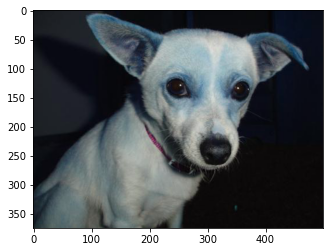

In [23]:
TEST_PATH = "C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\test"
test_dogs_images = os.listdir(TEST_PATH + os.sep+ "dogs/")

test_dog_img = test_dogs_images[3]
test_dog_img = cv.imread(TEST_PATH + os.sep+ "dogs/" + test_dog_img)

plt.figure()
plt.imshow(test_dog_img)

test_dog_img = cv.resize(test_dog_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_dog_img = test_dog_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model1.predict(test_dog_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")

1/1 [==============================] - 0s 56ms/step
Model : It's a DOG


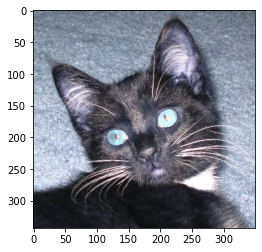

In [27]:
TEST_PATH = "C:\\Users\\Arbaj\\Downloads\\1577957291_deeplearningwithkerasandtensorflow\\data\\test"
test_cats_images = os.listdir(TEST_PATH + os.sep+ "cats/")

test_cat_img = test_cats_images[1]
test_cat_img = cv.imread(TEST_PATH + os.sep+ "cats/" + test_cat_img)

plt.figure()
plt.imshow(test_cat_img)

test_cat_img = cv.resize(test_cat_img / 255, (IMAGE_SHAPE, IMAGE_SHAPE))
test_cat_img = test_cat_img.reshape(1, IMAGE_SHAPE, IMAGE_SHAPE, 3)

prediction = model1.predict(test_cat_img)

if prediction[0][0] <= 0.5:
    print("Model : It's a CAT")
else:
    print("Model : It's a DOG")